# core

> random geometric graph class

In [ ]:
#| hide
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [ ]:
#| export
import numpy as np
import functools
import seaborn.objects as so
import collections
from fastcore.basics import patch

In [ ]:
#| export
class RGG:
    """random geometric graph"""
    def __init__(self,n:int,r:float):
        self.n = n
        self.r = r
        self.points = np.random.default_rng().random((n,2))
    
    @functools.cached_property
    def distances(self):
        return np.array([np.sqrt(np.sum((x- self.points)**2, axis=1)) for x in self.points])

    @functools.cached_property
    def adj(self):
        mask = self.distances < self.r
        return {i: [j for j,v in enumerate(row) if v and j != i] for i,row in enumerate(mask)}
    
    def n_comp(self):
        def dfs(gr,s):
            for v in gr[s]:
                if v not in self.parent:
                    self.parent[v]=s
                    dfs(gr,v)
                    self.topo.append(v)
        self.parent = {}
        self.topo=[]
        count = 0
        for i in range(self.n):
            if i not in self.parent:
                count+=1
                self.parent[i]=None
                dfs(self.adj,i)
                self.topo.append(i)
        return count

    def degree_distribution(self):
        dgr=collections.Counter([len(v) for _,v in self.adj.items()])
        return np.array(list(dgr.items()))
    
    def cyclic(self):
        pass

In [ ]:
rgg = RGG(100,0.1)

In [ ]:
rgg.adj

{0: [3, 61],
 1: [51],
 2: [21, 26, 28, 56, 96],
 3: [0, 61],
 4: [27],
 5: [18, 19, 30, 31, 61],
 6: [32, 33, 47, 67, 77, 78],
 7: [23, 25, 37, 76],
 8: [82],
 9: [39],
 10: [59, 86, 88, 91],
 11: [14, 20, 24],
 12: [34],
 13: [22, 69, 83],
 14: [11, 20],
 15: [40],
 16: [54],
 17: [54],
 18: [5, 19, 30, 31, 61],
 19: [5, 18],
 20: [11, 14],
 21: [2, 26, 28, 96],
 22: [13, 49, 72, 83, 87, 93],
 23: [7, 25, 37, 42],
 24: [11, 44, 63, 79],
 25: [7, 23, 37, 42, 76],
 26: [2, 21, 28],
 27: [4],
 28: [2, 21, 26],
 29: [50, 65, 92],
 30: [5, 18, 31, 97],
 31: [5, 18, 30, 61],
 32: [6, 33, 67, 81],
 33: [6, 32, 47, 67, 81],
 34: [12, 52, 99],
 35: [],
 36: [72, 93],
 37: [7, 23, 25, 42, 76],
 38: [],
 39: [9],
 40: [15, 56, 96],
 41: [55, 58],
 42: [23, 25, 37],
 43: [53],
 44: [24, 63],
 45: [73],
 46: [68, 84, 88, 89, 91],
 47: [6, 33, 51, 67, 77, 78],
 48: [85],
 49: [22, 83, 87, 93],
 50: [29, 87],
 51: [1, 47],
 52: [34],
 53: [43],
 54: [16, 17],
 55: [41, 58],
 56: [2, 40, 96],
 57: [

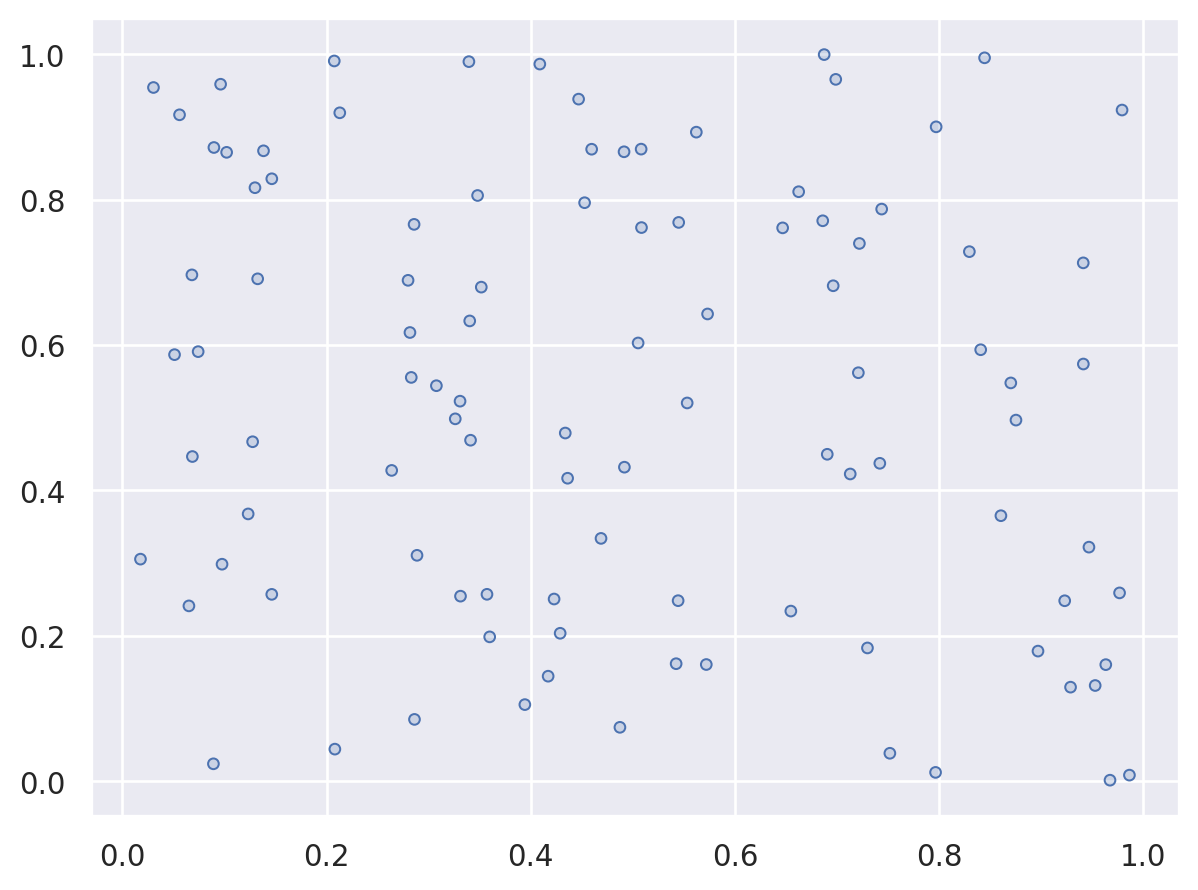

In [ ]:
p = so.Plot(x=rgg.points[:,0], y=rgg.points[:,1])
p.add(so.Dots())

In [ ]:
rgg.n_comp()

24

In [ ]:
d_np = rgg.degree_distribution()
d_np

array([[ 2, 23],
       [ 1, 23],
       [ 5, 14],
       [ 6,  5],
       [ 4, 15],
       [ 3, 13],
       [ 0,  7]])

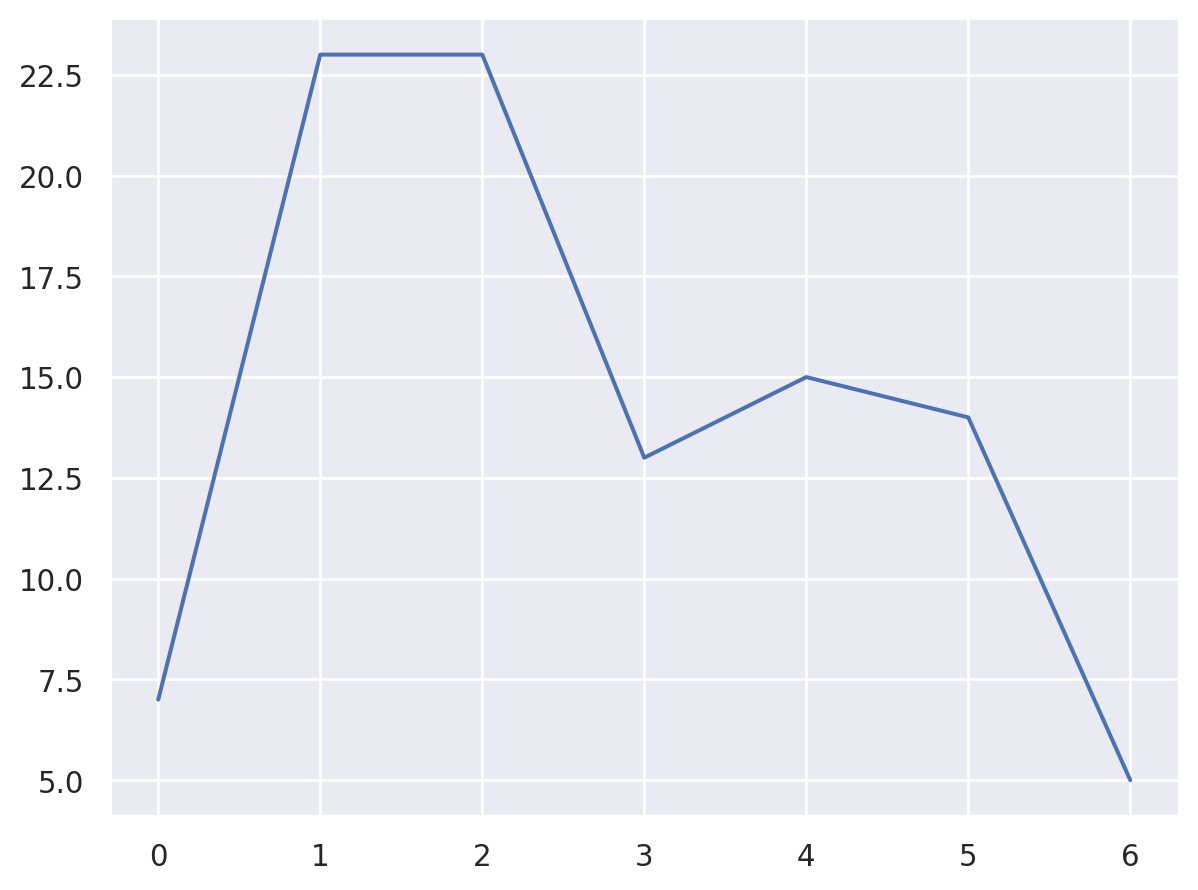

In [ ]:
(
    so.Plot(x=d_np[:,0], y=d_np[:,1])
    .add(so.Line())
)

In [ ]:
#| export
@patch
def cyclic(self:RGG):
    for k, lst in self.adj.items():
        for v in lst:
            if k != self.parent[v] and v!=self.parent[k]: 
                return True
    return False

In [ ]:
rgg.cyclic()

True

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()